In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.rcParams["figure.figsize"] = [16,9]

In [5]:
mydateparser = lambda x: pd.datetime.strptime(x, "%Y %m %d %H:%M:%S")
df = pd.read_json("../static/Resources/twitter_data.json", convert_dates=['date'])


In [6]:
df.head()

,date,id,text,user_id,user_name
0,2019-06-17 20:55:26,1140724655080267782,@bzogrammer @robinhanson Many algorithms in co...,295218901,VitalikButerin
1,2019-06-17 20:51:34,1140723684040204288,@glibbertarian @robinhanson Not claiming it do...,295218901,VitalikButerin
2,2019-06-17 20:49:33,1140723177762500608,@robinhanson Oh I'm sure there's much better m...,295218901,VitalikButerin
3,2019-06-17 20:45:51,1140722244798373889,@robinhanson I'm not claiming that the effect ...,295218901,VitalikButerin
4,2019-06-17 20:43:54,1140721755541168129,"@robinhanson Making it ""illegal"" from the star...",295218901,VitalikButerin


In [14]:
# Group by day - TODO - need to agg to get average per day
day_grouper = df.groupby([pd.Grouper(key="date", freq='D'), "user_name"])
day_count = day_grouper['id'].agg(['count']).reset_index()
day_count.groupby('user_name').agg({'count': 'mean'})

,count
user_name,
ErikVoorhees,6.685185
NickSzabo4,23.522059
SatoshiLite,8.810959
VitalikButerin,11.357895
aantonop,7.212054
brian_armstrong,3.128205
justinsuntron,8.619048
naval,9.200573
officialmcafee,47.764706


In [13]:
month_grouper = df.groupby([pd.Grouper(key="date", freq='M'), "user_name"])
month_count = month_grouper['id'].agg(['count']).reset_index()
month_count.head()

,date,user_name,count
0,2011-07-31,rogerkver,3
1,2011-08-31,rogerkver,2
2,2011-09-30,rogerkver,3
3,2011-10-31,rogerkver,8
4,2011-11-30,rogerkver,16


/Users/TheDoctor/.virtualenvs/Crypto-project/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


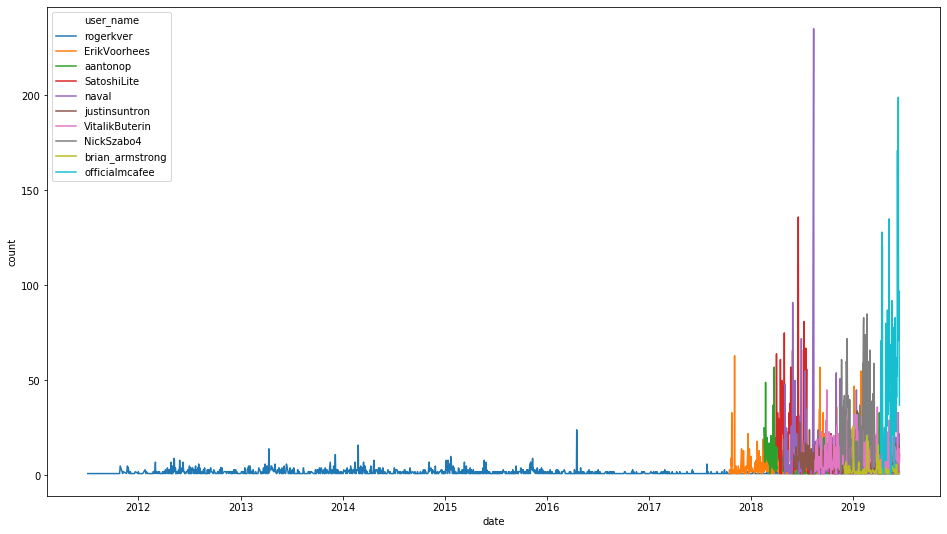

In [8]:
# Look at all users
ax = sns.lineplot(x="date", y="count", hue="user_name", data=day_count)

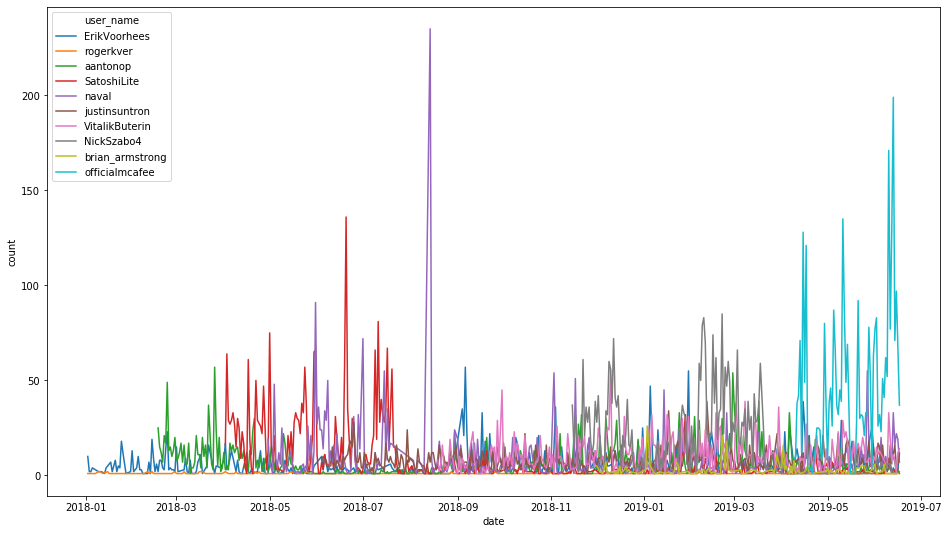

In [9]:
# Filter by date
filter_date = pd.Timestamp(datetime(2018, 1, 1))
date_filtered_count = day_count.loc[day_count['date'] > filter_date]
ax = sns.lineplot(x="date", y="count", hue="user_name", data=date_filtered_count)
fig = ax.get_figure()


rogerkver
ErikVoorhees
aantonop
SatoshiLite
naval
justinsuntron
VitalikButerin
NickSzabo4
brian_armstrong
officialmcafee


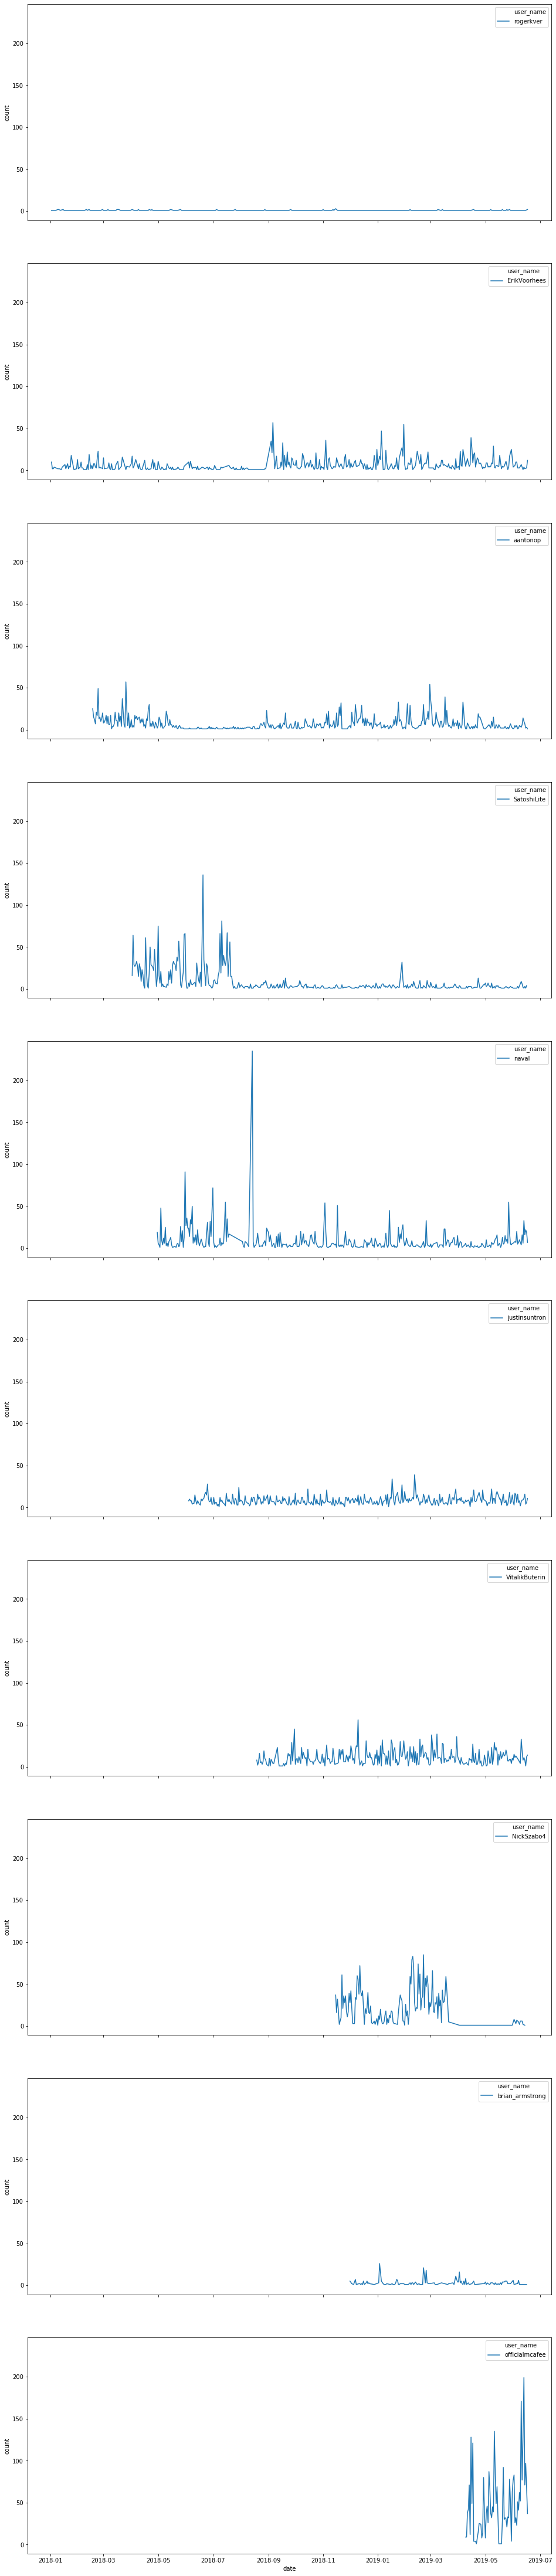

In [10]:
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(16, 80), sharex=True, sharey=True)
# fig.subplots_adjust(hspace=0.5)
count = 0
for user, ax in zip(day_count['user_name'].unique(), axes.flatten()):
    print(user)
    ax = sns.lineplot(
        x="date", y="count", hue="user_name", ax=ax,
        data=date_filtered_count.loc[date_filtered_count['user_name'] == user])
    